In [18]:
#importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [19]:
#dataset loading
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
std_data = pd.read_csv(url)

In [20]:
# view data loaded

print(std_data.shape)
std_data.head()

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [21]:
std_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [22]:
std_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


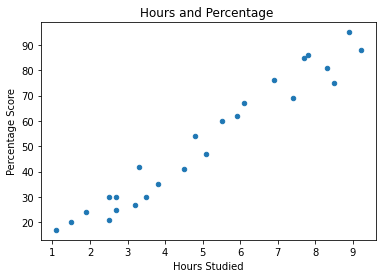

In [23]:
std_data.plot(kind='scatter' , x = 'Hours', y = 'Scores')
plt.title('Hours and Percentage ')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [24]:
#the corelation coefficient of the data using Pearson's Method
std_data.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [25]:
#the corelation coefficient of the data using Spearman's Method
std_data.corr(method='spearman')

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


In [26]:
X = std_data.iloc[:, :-1].values
y = std_data.iloc[:, 1].values 

In [27]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 , random_state = 20)

In [28]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

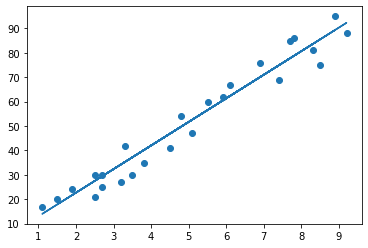

In [30]:
a = linreg.coef_
b = linreg.intercept_
line = a*X+b
plt.scatter(X,y)
plt.plot(X,line)
plt.show()

In [32]:
y_pred =  linreg.predict(X_test)
print("The Predicted values are", y_pred)

The Predicted values are [74.90959672 70.0740592  46.86347911 37.19240407 62.33719917]


In [33]:
std_data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
std_data

,Actual,Predicted
0,69,74.909597
1,76,70.074059
2,41,46.863479
3,30,37.192404
4,67,62.337199


In [34]:
hours = 9.25
pred_test = linreg.predict([[hours]])
print("number of hours = {}".format(hours))
print("Predicted score ={}".format(pred_test[0]))

number of hours = 9.25
Predicted score =92.80108554200021


In [35]:
#Evaluating the model to test ther Algorithm Performance
from sklearn import metrics
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 5.91084430646127
